## Hypergeometric Distribution (Sampling without replacement)

A we saw before, Bernoulli trials that are indepedent (sampling with replacement) follow a binomial distribution, the case when we sample without replacement (trials are not independent) then our probabilities follow an hypergeometric distribution

As our previous discrete distributions, the hypergeometric describes the probability of k successes, in multiple n draws. The difference is that the sample comes from a population of size N where there are exactly K objects with that feature.

Similar to the binomial distribution we have a binomial choice in terms of our probability (success/failure, On/off, etc..)
In contrast to the binomial, each draw in dependent of each previous draw, and the probability of success is linked to the reduction in the population.




$$PDF = P(X = k) = \frac {{K \choose k} * {N - K \choose n - k}}{N \choose n}  $$

K is the number of successes in the population - k is the number of observed successes

N is the population size - n is the sample size (number of draws)

$$\mu = n \frac {K}{N}$$

$$\sigma^2 = n \frac {K}{N} * (\frac {N - K}{N}) * (\frac {N -n }{N - 1}) $$


#### Example 1

A deck of cards contains 20 cards: 6 red cards and 14 black cards. 5 cards are drawn randomly without replacement. What is the probability that exactly 4 red cards are drawn?


N = 20
n = 5
K = 6
k = 4

$$ P(X = k) = \frac {{K \choose k} * {N - K \choose n - k}}{N \choose n}  $$

$$ P(X = k) = \frac {{6 \choose 4} * {20 - 6 \choose 5 - 4}}{20 \choose 5}  $$

$$ P(X = k) = \frac {{6 \choose 4} * {14 \choose 1}}{20 \choose 5}  $$

$$ P(X = k) = \frac {{6 \choose 4} * {14 \choose 1}}{20 \choose 5}  $$

$$ P(X = k) = 0.0135$$




#### Example 2

A small voting district has 101 female voters and 95 male voters. A random sample of 10 voters is drawn. What is the probability exactly 7 of the voters will be female?

N = 196 n = 10 K = 101 k = 7


In [1]:
##R has a little different notation, where we 

dhyper(7,101,95,10)
?dhyper()

[1] 0.1303964

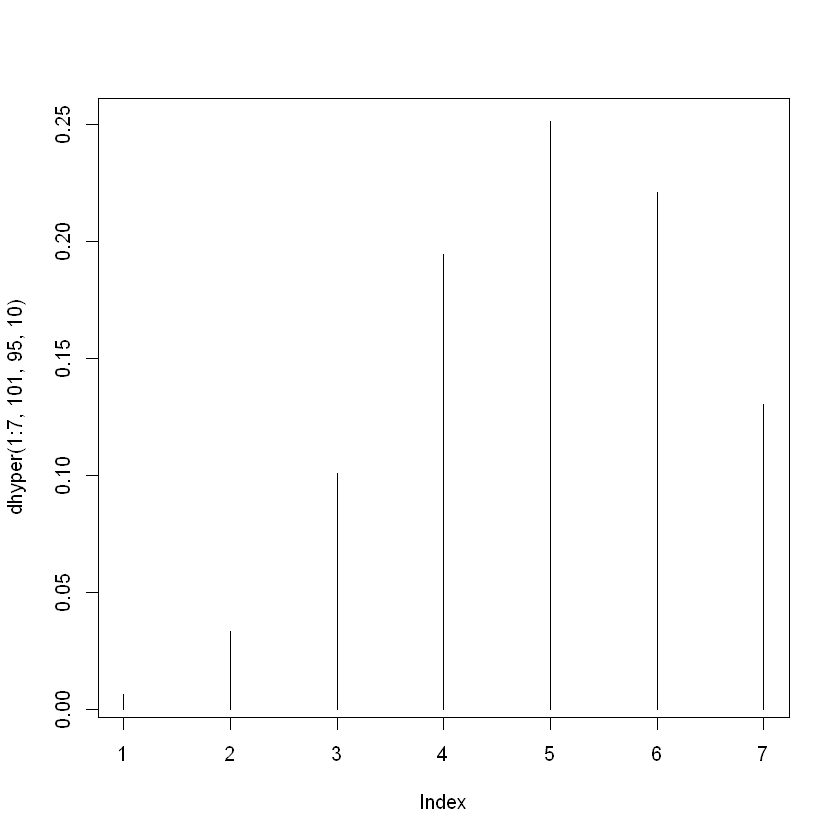

In [2]:
plot(dhyper(1:7,101,95,10),type = "h")

#### Example 3

In a deep sequencing of an experimental and a control tissue. The reference genome has ~15,000 genes. 3,000 out of 15,000 genes are enriched above a certain cut-off in the sample of interest compared to control.

In a previous ChIP on chip experiment, it was found 400 genes are enriched by ChIP on chip. Of the 400 ChIP-chip genes, 100 genes were in the group of 3,000 enriched RNA-Seq transcripts.

What is the probability that the ChIP-chip genes would be enriched by RNA-Seq by chance alone?

in other words, what is the probability of getting 100 or more enriched genes from the 3000 genes (out of the 15000 total genes) in a sample of size 400 

In [ ]:
#N = 15000, K = 3000, n = 400, k = 100, we also need N-K = 12000

##Note that we 100 or more  - we can then use CDF

phyper(99,3000,12000, 400, lower.tail=FALSE) #---> lower tail is the same as CDF of 1-(100:400)

#or 

sum(dhyper(100:400,3000,12000, 400))

In [ ]:
##If we plot the whole distribution we get an approximation to the binomial with long tails

plot(dhyper(0:400,3000,12000, 400), type = "h", xlim = c(0,120))

In [ ]:
plot(phyper(0:400,3000,12000, 400), type = "h", xlim = c(0,110))

In [ ]:
plot(phyper(100:400,3000,12000, 400, lower.tail = F), type = "h", xlim = c(0,110))

## Poisson Distribution

In the poisson distribution we are interested in investigate the probability that an event ocurred n times in an interval of time (or space).

Here, we are interested in count the number of times an event occurs, where the events are independent

In this case we actually know the average number of successes $\mu$, and this rate is constant.

$$ P\left( k \right) = \frac{{e^{ - \lambda } \lambda ^k }}{{k!}}$$

Where k is the number of times an events occurs

lambda $\lambda$ is the average number of events in an interval, $\lambda$ is also called the rate parameter

e is the number 2.71828... (Euler's number) the base of the natural logarithms


### $$ \mu = \lambda$$

### $$ \sigma = \sqrt \lambda $$

### $$ \sigma^2 = \lambda $$


The Poisson distribution may be useful to model events such as (Wikipedia)

* The number of mutations in set sized regions of a chromosome
* The number of meteorites greater than 1 meter diameter that strike Earth in a year
* The number of patients arriving in an emergency room between 10 and 11 pm
* The number of cases of a disease in different towns
* The number of births per hour during a given day

Example 1

The average number of homes sold by the Acme Realty company is 2 homes per day. What is the probability that exactly 3 homes will be sold tomorrow?

$\lambda = 2$

k = 3

#### $$= \frac{{e^{ - \lambda } \lambda ^k }}{{k!}}$$ 

#### $$= \frac{{e^{ - 2 } 2 ^3 }}{{3!}}$$ 

#### the probability of selling 3 homes tomorrow $ = 0.180$

In [ ]:
###As we can see as we increase in lambda the positive skew decreases and the variance increases
par(mfrow = c(1, 3)) 
plot(0:20, dpois(0:20, 3), type = "h", ylim = c(0, 0.25),
    xlab = "X", main = "Po(3)", ylab = "P(X)", lwd = 3, 
    cex.lab = 1.5, cex.axis = 2,
                          cex.main = 2) 
plot(0:20, dpois(0:20, 5), type = "h", 
     ylim = c(0, 0.25), xlab = "X",main = "Po(5)",
     ylab = "P(X)", lwd = 3, cex.lab = 1.5, cex.axis = 2, cex.main =
                                               2) 

plot(0:20, dpois(0:20, 10),type = "h", ylim = c(0, 0.25), 
     xlab = "X", main = "Po(10)", ylab = "P(X)", 
     lwd = 3, cex.lab = 1.5, cex.axis = 2, cex.main = 2)

#### Example 2

Suppose the average number of lions seen on a 1-day safari is 5. What is the probability that tourists will see fewer than four lions on the next 1-day safari?

In [ ]:
?ppois()
ppois(3,5)
sum(dpois(0:3,5))